In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('infosys.csv', parse_dates=['Date'], infer_datetime_format=True, index_col='Date', dayfirst=True)

In [3]:
df.head(15)

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2000-01-03  5.890625  5.906250  5.462891  5.767578   3.861567   5331200
2000-01-04  5.641113  6.281250  5.570313  5.812500   3.891644   5056000
2000-01-05  5.476563  5.855469  5.328125  5.765625   3.860260   6054400
2000-01-06  5.598633  5.703125  5.156250  5.156250   3.452265   4704000
2000-01-07  4.945313  5.515625  4.703125  5.515625   3.692876   7884800
2000-01-10  5.812500  5.847656  5.546875  5.593750   3.745184   3532800
2000-01-11  5.441406  5.442383  5.149414  5.265625   3.525495   8512000
2000-01-12  5.375000  5.546875  4.906250  5.171875   3.462727   3968000
2000-01-13  5.343750  5.343750  4.875000  4.968750   3.326727   2560000
2000-01-14  5.100586  5.269531  4.644531  4.658203   3.118808   7091200
2000-01-18  4.390625  4.843750  4.156250  4.816406   3.224729  10982400
2000-01-19  4.781250  4.937500  4.667969  4.746094   3.177653   2316800
2000-01-20  4.738281  4.890625  4.574219  4.621094   3.093962   4780800
2000-01-21  4.601563  4.890625  4.531250  4.742188   3.175037   7692800
2000-01-24  4.796875  4.994141  4.765625  4.968750   3.326727   6758400

In [5]:
df_new=df.iloc[::7].filter(['Open'])

In [6]:
df_new.count()

Open    827
dtype: int64

<AxesSubplot:xlabel='Date'>

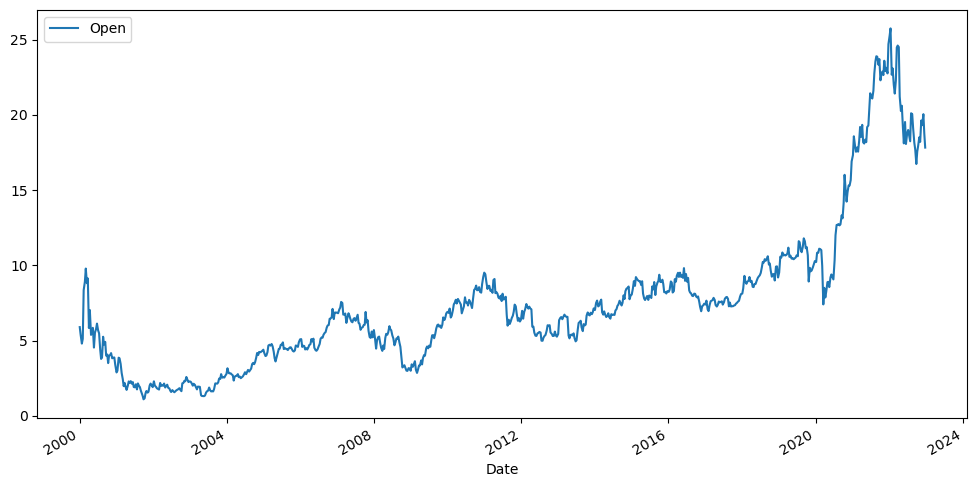

In [7]:
df_new.plot(figsize=(12,6))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#scaling=np.array(df_new)
scaling=scaler.fit_transform(df_new)
scaling

array([[0.19461877],
       [0.17369747],
       [0.15024026],
       [0.16291984],
       [0.29447044],
       [0.31697667],
       [0.35247948],
       [0.31301431],
       [0.32585237],
       [0.19224134],
       [0.24074074],
       [0.17369747],
       [0.18602044],
       [0.19271684],
       [0.13946262],
       [0.17987878],
       [0.18962618],
       [0.20404921],
       [0.18621856],
       [0.17781836],
       [0.13383606],
       [0.10887316],
       [0.11283552],
       [0.16862564],
       [0.14770435],
       [0.1548366 ],
       [0.11774886],
       [0.12076027],
       [0.09762003],
       [0.11798659],
       [0.1191753 ],
       [0.12456414],
       [0.11061661],
       [0.11220154],
       [0.11283552],
       [0.09373691],
       [0.07241936],
       [0.07701574],
       [0.11220154],
       [0.11053733],
       [0.09540112],
       [0.07099292],
       [0.05443023],
       [0.03549011],
       [0.04420733],
       [0.03311268],
       [0.02535915],
       [0.036

In [9]:
train_len=round(len(scaling)*0.7)
train_len
training_data=scaling[:train_len]
testing_data=scaling[train_len:]

In [10]:

def preprocess(num_steps,data):
    # Prepare the training data
    X, y = [], []
    for i in range(num_steps, len(data)):
        X.append(data[i - num_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)


In [25]:

step_size=10
x_train,y_train=preprocess(step_size,training_data)
x_test,y_test=preprocess(step_size,testing_data)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((569, 10, 1), (569, 1), (238, 10, 1), (238, 1))

In [12]:
import tensorflow as tf
from keras.layers import Dense,LSTM
from keras.models import Sequential
model2 = Sequential()
model2.add(LSTM(units=64, activation='tanh', input_shape=(step_size, 1)))
model2.add(Dense(units=1))
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])

In [13]:
model2.fit(x_train,y_train,epochs=20)

Epoch 1/20
18/18 [==============================] - 4s 10ms/step - loss: 0.0134 - mean_absolute_error: 0.0890
Epoch 2/20
18/18 [==============================] - 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0440
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0014 - mean_absolute_error: 0.0308
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 7.1856e-04 - mean_absolute_error: 0.0217
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 5.6769e-04 - mean_absolute_error: 0.0187
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 5.6444e-04 - mean_absolute_error: 0.0186
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 5.6138e-04 - mean_absolute_error: 0.0186
Epoch 8/20
18/18 [==============================] - 0s 10ms/step - loss: 5.5077e-04 - mean_absolute_error: 0.0185
Epoch 9/20
18/18 [==============================] - 0s 10ms/step - loss: 5.4489e-04 - mean_absolute_e

8/8 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'actual vs predict on training data')

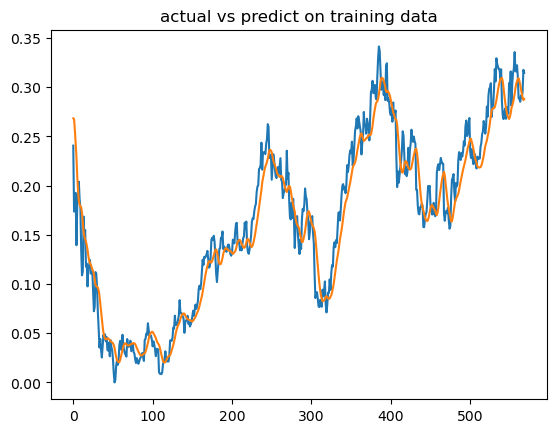

In [14]:
train_predict=model2.predict(x_train)
test_predict=model2.predict(x_test)
plt.plot(y_train)
plt.plot(train_predict)
plt.title("actual vs predict on training data")


Text(0.5, 1.0, 'actual vs predict on testing data')

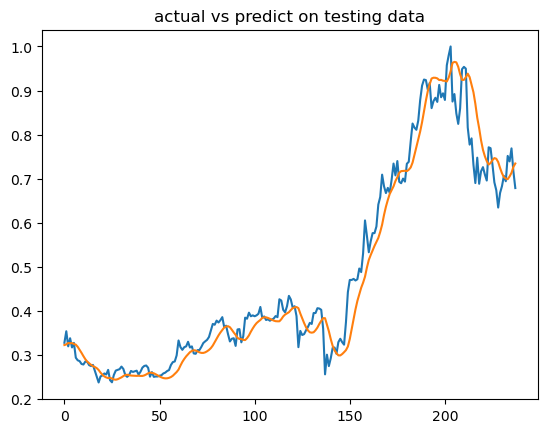

In [15]:
plt.plot(y_test)
plt.plot(test_predict)
plt.title("actual vs predict on testing data")

In [38]:
X_pred2 = []
temp=0
data2=testing_data[-step_size:,]
for i in range(2):  # Predict for the next 30 days
    X_pred2.append(data2)
    #print(f'length of X_pred at iteration{i} {X_pred}')
    #print(X_pred)
    pred_input2 = np.array(X_pred2[-1].reshape(1, step_size+i,1))
    #print("shape of rped_input",pred_input.shape)
    pred2 = model2.predict(pred_input2)
    #print("prediction shape",pred.shape)
    data2 = np.concatenate((data2, pred2), axis=0)
    #print(f'test data at iteration{i} {data2}')
    temp=np.array(data2)


1/1 [==============================] - 1s 736ms/step


In [39]:
temp

array([[0.6344225 ],
       [0.66769366],
       [0.68311207],
       [0.70623961],
       [0.69406726],
       [0.75168325],
       [0.73910503],
       [0.7687246 ],
       [0.71638327],
       [0.67864886],
       [0.73452204],
       [0.74236035]])

In [40]:
original_data2=testing_data[-step_size:,]
predicted_data2=data2[-step_size:,]
original_data2.shape

(10, 1)

In [41]:
original_data2=original_data2.reshape(10,)
original_data2.shape

(10,)

In [42]:
predicted_data3=np.array(predicted_data2)
predicted_data3
predicted_data3=predicted_data3.reshape(10)
predicted_data3.shape

(10,)

Text(0.5, 1.0, 'Actual data of previous 5 weeks  and predicted data for the next 5 weeks ')

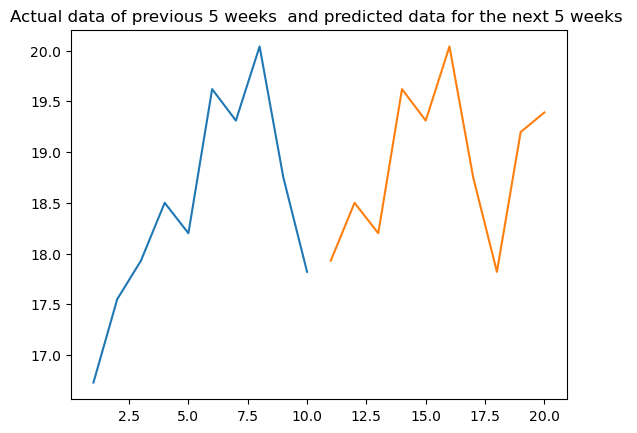

In [43]:

actual=np.arange(1,11)
predict=np.arange(11,21)
plt.plot(actual,scaler.inverse_transform(original_data2.reshape(-1,1)))
plt.plot(predict,scaler.inverse_transform(predicted_data3.reshape(-1,1)))
plt.title("Actual data of previous 5 weeks  and predicted data for the next 5 weeks ")

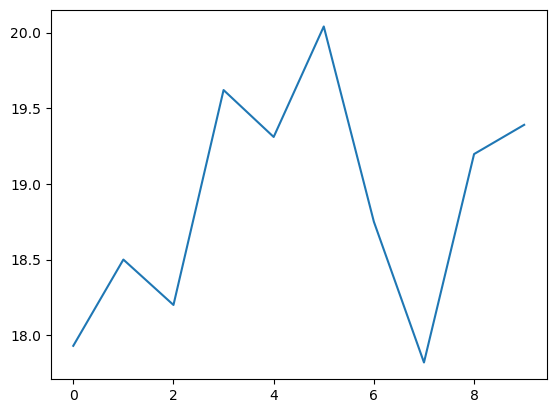

In [44]:
plt.plot(scaler.inverse_transform(predicted_data3.reshape(-1,1)))


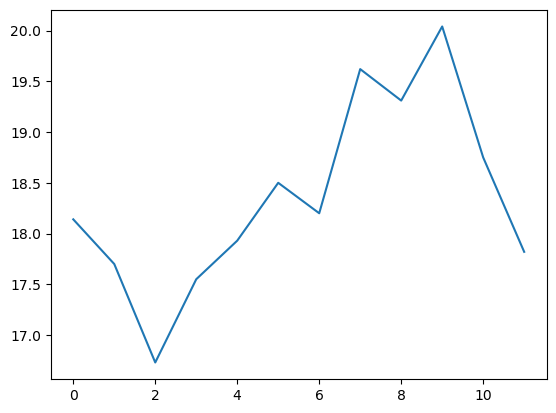

In [45]:
plt.plot(scaler.inverse_transform(testing_data[-12:].reshape(-1,1)))


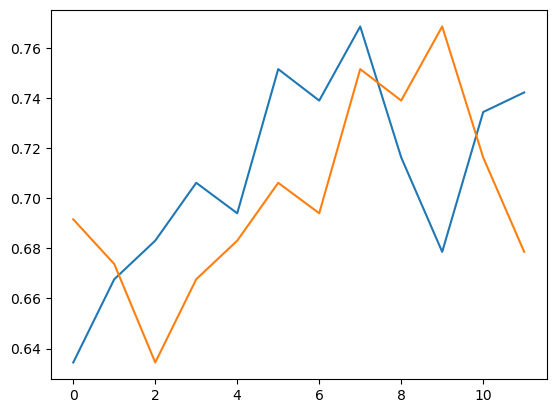

In [46]:
plt.plot(temp)
plt.plot(testing_data[-12:])

In [47]:
temp,testing_data[-12:]

(array([[0.6344225 ],
        [0.66769366],
        [0.68311207],
        [0.70623961],
        [0.69406726],
        [0.75168325],
        [0.73910503],
        [0.7687246 ],
        [0.71638327],
        [0.67864886],
        [0.73452204],
        [0.74236035]]),
 array([[0.6916327 ],
        [0.67377994],
        [0.6344225 ],
        [0.66769366],
        [0.68311207],
        [0.70623961],
        [0.69406726],
        [0.75168325],
        [0.73910503],
        [0.7687246 ],
        [0.71638327],
        [0.67864886]]))